In [175]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.optimize import curve_fit

In [176]:
V = np.array([1.8,2,2.2,2.4,2.6,2.8,3,3.2,3.4,3.6,3.8,4,4.2,4.4,4.6,4.8,5])*1000
v_ = 1/V**0.5
e_v = np.ones(len(V))*0.05
D_1 =np.array([3.7, 3.6, 3.5,3.4, 3.3, 3.2, 3.15, 3.1, 3, 2.9, 2.8, 2.7, 2.6,2.5, 2.4, 2.3, 2.1])*10**(-2)
D_2 = np.array([7, 6.8, 6.4, 6, 5.7, 5.6,5.3, 4.9, 4.8, 4.8, 4.7, 4.6,4.55, 4.5, 4.4, 4.3, 4.15])*10**(-2)
e_1 = np.array([0.2, 0.3, 0.5, 0.3, 0.3, 0.3,0.3, 0.3, 0.3, 0.3, 0.3, 0.3,0.3, 0.3, 0.3, 0.3, 0.3])*10**(-2)
e_2 = np.array([0.4, 0.4, 0.3, 0.3, 0.4, 0.3,0.3, 0.3, 0.3, 0.3, 0.3, 0.3,0.3, 0.3, 0.3, 0.3, 0.3])*10**(-2)

Lambda de Bragg

In [177]:
h = 6.63e-34
e = 1.6*10**(-19)

me =  9.11*10**(-31)
lambda_bragg = h/(2*e*V*me)**0.5*10**12
lambda_bragg

array([28.94297025, 27.45771247, 26.17990163, 25.0653475 , 24.08200692,
       23.20600252, 22.41912835, 21.70722769, 21.05910414, 20.46577053,
       19.91991828, 19.41553468, 18.94762172, 18.51198597, 18.10507945,
       17.72387719, 17.36578215])

Lambda de broglie

In [178]:
l = 0.135
lamb_bg1 = 2*210*10**(-12)*np.sin(0.5*np.arctan(D_1/(l*2)))*10**(12)
print(lamb_bg1)
lamb_bg2 = 2*113e-12*np.sin(0.5*np.arctan(D_2/(l*2)))*10**(12)
print(lamb_bg2)

[28.57754306 27.81544822 27.05252137 26.28878394 25.52425751 24.7589638
 24.37603603 23.99292464 23.22616201 22.458698   21.69055482 20.92175479
 20.15232036 19.38227407 18.61163859 17.84043666 16.29642497]
[28.58837552 27.80879601 26.24047171 24.66039045 23.4679622  23.06913278
 21.86871958 20.25938129 19.85554522 19.85554522 19.45112931 19.04614407
 18.84344127 18.64060013 18.23450821 17.82787912 17.21695213]


In [179]:
df = pd.DataFrame({
    'lamb_bg1 (pm)': lamb_bg1,
    'lamb_bg2 (pm)': lamb_bg2,
    'lambda_bragg (pm)': lambda_bragg
})

# Mostrando la tabla
print(df)

    lamb_bg1 (pm)  lamb_bg2 (pm)  lambda_bragg (pm)
0       28.577543      28.588376          28.942970
1       27.815448      27.808796          27.457712
2       27.052521      26.240472          26.179902
3       26.288784      24.660390          25.065347
4       25.524258      23.467962          24.082007
5       24.758964      23.069133          23.206003
6       24.376036      21.868720          22.419128
7       23.992925      20.259381          21.707228
8       23.226162      19.855545          21.059104
9       22.458698      19.855545          20.465771
10      21.690555      19.451129          19.919918
11      20.921755      19.046144          19.415535
12      20.152320      18.843441          18.947622
13      19.382274      18.640600          18.511986
14      18.611639      18.234508          18.105079
15      17.840437      17.827879          17.723877
16      16.296425      17.216952          17.365782


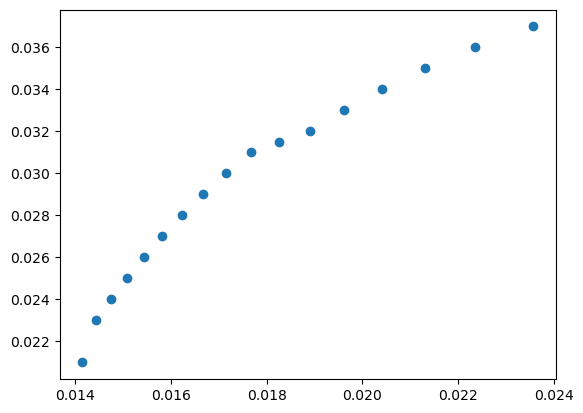

In [148]:
plt.scatter(v_, D_1)

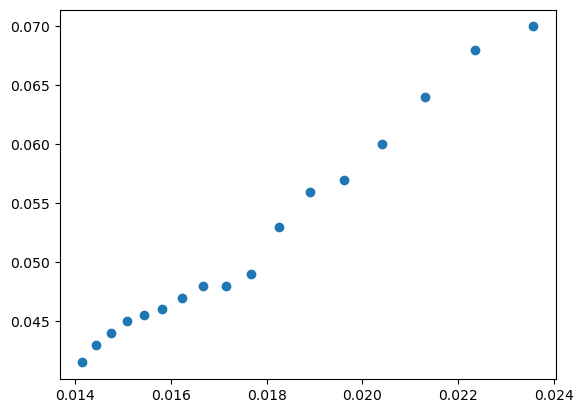

In [149]:
plt.scatter(v_, D_2)

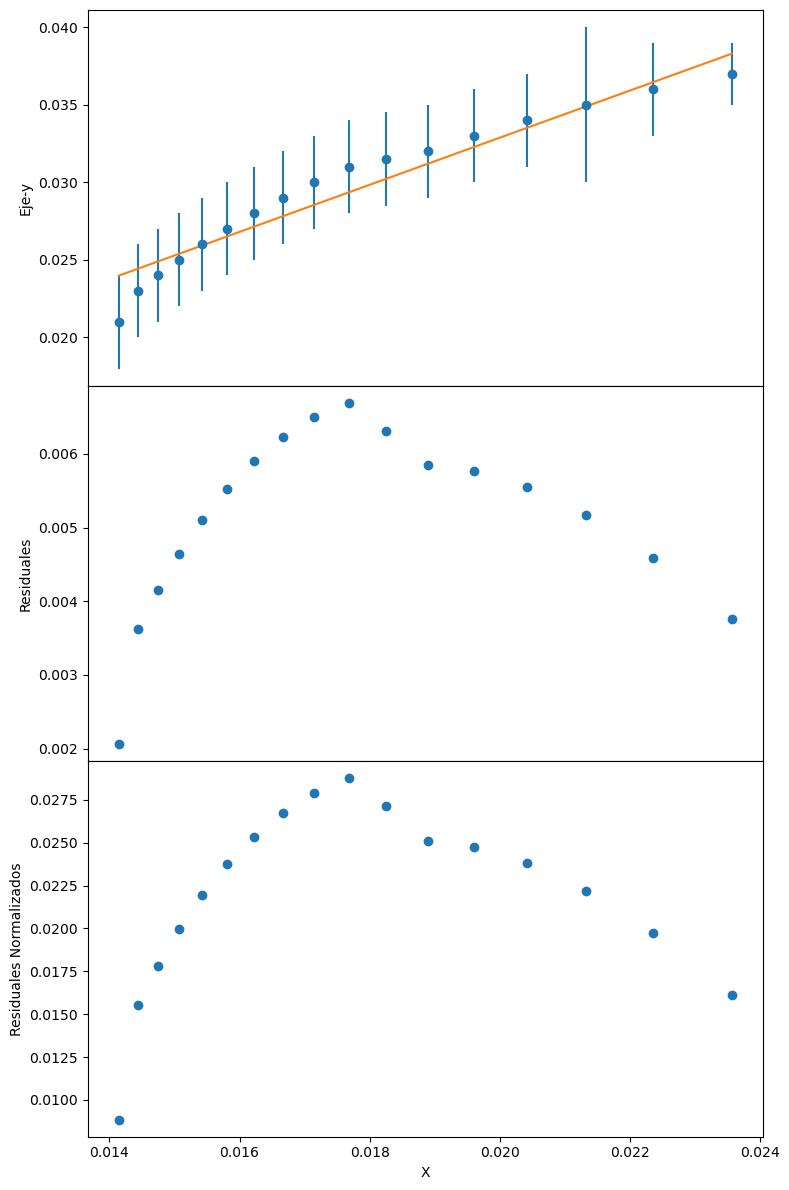

In [215]:
def minimos_cuadrados_incertidumbre(x,y,i,name="Regresion",plot = True,Descargar= False):
    w = 1/(i**2)
    sum_w_x_2 = np.sum((x**2)*w)
    sum_w_y = np.sum(w*y)
    sum_w_x = np.sum(w*x)
    sum_w_x_y = np.sum(w*x*y)
    sum_w = np.sum(w)
    delta_prima = (sum_w*sum_w_x_2)-(sum_w_x)**2 
    pendiente = ((sum_w*sum_w_x_y)-(sum_w_x*sum_w_y))/delta_prima
    intercepto = ((sum_w_x_2*sum_w_y)-(sum_w_x*sum_w_x_y))/delta_prima
    error_inter = np.sqrt(sum_w_x_2/delta_prima)
    error_m = np.sqrt(sum_w/delta_prima)
    residuales = y-(pendiente*x)+intercepto
    normalize_residuales = (y-pendiente*x+intercepto)/error_m
    if plot:
        fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True, gridspec_kw={'hspace': 0})
        axs[0].errorbar(x, y, yerr=i, fmt='o')       
        axs[0].plot(x,pendiente*x+intercepto)
        axs[1].scatter(x,residuales)
        axs[2].scatter(x,normalize_residuales)
        axs[0].set_ylabel('Eje-y')
        axs[1].set_ylabel('Residuales')
        axs[2].set_ylabel('Residuales Normalizados')
        plt.xlabel('X')
        plt.tight_layout()
        if Descargar:
            ruta = os.getcwd()
            name =name+".png"
            ruta_completa = f"{ruta}/{name}"
            plt.savefig(ruta_completa, bbox_inches='tight', pad_inches=1.0)
    return pendiente,intercepto, error_inter, error_m, residuales, normalize_residuales

m_1,b_1,eb_1,em_1,r_1, rn_1 =minimos_cuadrados_incertidumbre(v_, D_1, e_1)

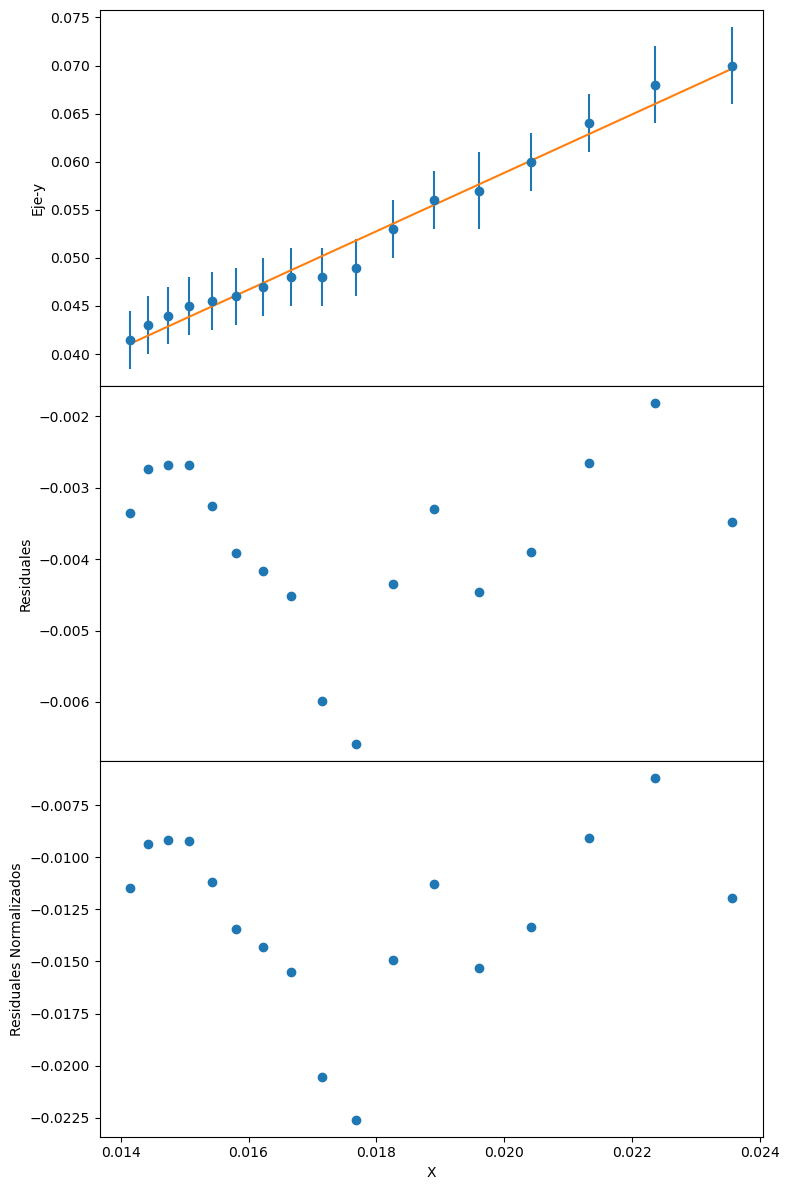

In [216]:
def minimos_cuadrados_incertidumbre(x,y,i,name="Regresion",plot = True,Descargar= False):
    w = 1/(i**2)
    sum_w_x_2 = np.sum((x**2)*w)
    sum_w_y = np.sum(w*y)
    sum_w_x = np.sum(w*x)
    sum_w_x_y = np.sum(w*x*y)
    sum_w = np.sum(w)
    delta_prima = (sum_w*sum_w_x_2)-(sum_w_x)**2 
    pendiente = ((sum_w*sum_w_x_y)-(sum_w_x*sum_w_y))/delta_prima
    intercepto = ((sum_w_x_2*sum_w_y)-(sum_w_x*sum_w_x_y))/delta_prima
    error_inter = np.sqrt(sum_w_x_2/delta_prima)
    error_m = np.sqrt(sum_w/delta_prima)
    residuales = y-(pendiente*x)+intercepto
    normalize_residuales = (y-pendiente*x+intercepto)/error_m
    if plot:
        fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True, gridspec_kw={'hspace': 0})
        axs[0].errorbar(x, y, yerr=i, fmt='o')       
        axs[0].plot(x,pendiente*x+intercepto)
        axs[1].scatter(x,residuales)
        axs[2].scatter(x,normalize_residuales)
        axs[0].set_ylabel('Eje-y')
        axs[1].set_ylabel('Residuales')
        axs[2].set_ylabel('Residuales Normalizados')
        plt.xlabel('X')
        plt.tight_layout()
        if Descargar:
            ruta = os.getcwd()
            name =name+".png"
            ruta_completa = f"{ruta}/{name}"
            plt.savefig(ruta_completa, bbox_inches='tight', pad_inches=1.0)
    return pendiente,intercepto, error_inter, error_m, residuales, normalize_residuales

m_2,b_2,eb_2,em_2,r_2,rn_2 = minimos_cuadrados_incertidumbre(v_, D_2, e_2)

Text(0.5, 0, '$V^{-1/2}$')

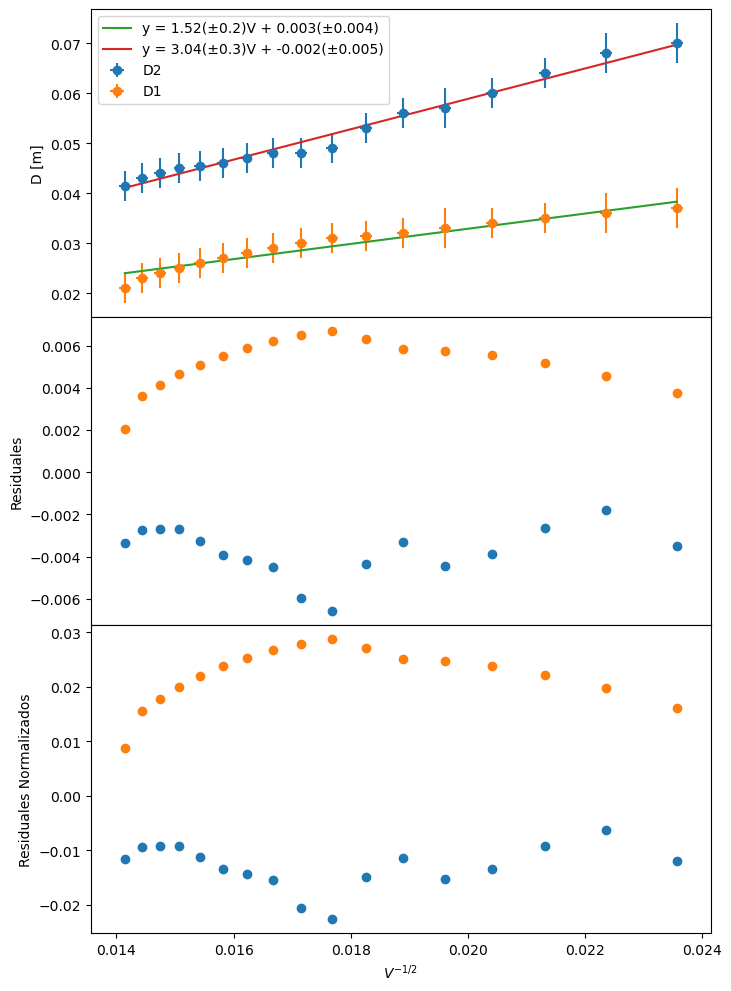

In [226]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True, gridspec_kw={'hspace': 0})
axs[0].errorbar(v_, D_2, xerr = 0.0001, yerr = e_2, fmt='o', label = "D2")  
axs[0].errorbar(v_, D_1, xerr = 0.0001,yerr = e_2, fmt='o', label = "D1") 
axs[0].plot(v_,m_1*v_+b_1,label=f"y = {round(m_1,2)}(±{round(em_1,1)})V + {round(b_1,3)}(±{round(eb_1,3)})")
axs[0].plot(v_,m_2*v_+b_2,label=f"y = {round(m_2,2)}(±{round(em_2,1)})V + {round(b_2,3)}(±{round(eb_2,3)})")
axs[0].legend()
axs[0].set_ylabel("D [m]")
axs[1].scatter(v_, r_2)
axs[1].scatter(v_, r_1)
axs[1].set_ylabel("Residuales")
axs[2].scatter(v_, rn_2)
axs[2].scatter(v_, rn_1)
axs[2].set_ylabel("Residuales Normalizados")
plt.xlabel(r"$V^{-1/2}$")

In [238]:
print("error de broglie")
e_brg = abs(h*0.5/((2*e*me)**0.5*V**(3/2))*10**12)*0.05
print(e_brg)

error de broglie
[4.01985698e-04 3.43221406e-04 2.97498882e-04 2.61097370e-04
 2.31557759e-04 2.07196451e-04 1.86826070e-04 1.69587716e-04
 1.54846354e-04 1.42123406e-04 1.31052094e-04 1.21347092e-04
 1.12783463e-04 1.05181738e-04 9.83971709e-05 9.23118604e-05
 8.68289108e-05]
